<a href="https://colab.research.google.com/github/tutalae/BTC/blob/master/5Forex_Uncorr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How to create a stock correlation matrix in python
from
https://medium.com/analytics-vidhya/how-to-create-a-stock-correlation-matrix-in-python-4f32f8cb5b50

In [120]:
#Import the libraries
import numpy as np 
import pandas as pd 
# Used to grab the stock prices, with yahoo 
import pandas_datareader as web 
from datetime import datetime 
# To visualize the results 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.5.0


In [5]:
from google.colab import files

uploaded = files.upload()

Saving gold.csv to gold.csv


In [17]:
#Clean data
gold = pd.read_csv("gold.csv")
gold.head()

,Unnamed: 0,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,USD.1,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,EUR.1,RUB,USD.2,ZAR,CNY.1,CAD.1,AUD
0,12/29/1978,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.1,NaN,226.0,NaN,NaN,NaN,NaN
1,1/1/1979,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.1,NaN,226.0,NaN,NaN,NaN,NaN
2,1/2/1979,226.8,137.3,"43,164.9",111.5,263.7,359.6,"1,792.9",NaN,226.8,NaN,735.6,"138,160.5",851.3,"4,454.6",NaN,NaN,"107,470.0",137.3,NaN,226.8,194.6,NaN,263.7,193.6
3,1/3/1979,218.6,134.0,"43,717.9",108.0,264.4,365.9,"1,802.2",NaN,218.6,NaN,739.4,"138,877.0",855.7,"4,477.7",NaN,NaN,"108,027.4",134.0,NaN,218.6,192.2,NaN,264.4,193.0
4,1/4/1979,223.2,136.8,"43,674.9",110.7,264.1,366.4,"1,811.7",NaN,223.2,NaN,743.4,"139,616.3",860.3,"4,501.5",NaN,NaN,"108,602.5",136.8,NaN,223.2,193.0,NaN,264.1,194.6


In [11]:
gold.columns

Index(['Unnamed: 0', 'USD', 'EUR', 'JPY', 'GBP', 'CAD', 'CHF', 'INR', 'CNY',
       'USD.1', 'TRY', 'SAR', 'IDR', 'AED', 'THB', 'VND', 'EGP', 'KRW',
       'EUR.1', 'RUB', 'USD.2', 'ZAR', 'CNY.1', 'CAD.1', 'AUD'],
      dtype='object')

In [18]:
gold = gold.rename(columns={'Unnamed: 0': 'Date'})
gold = gold.rename(columns={'USD': 'XAUUSD'})
gold = gold.rename(columns={'THB': 'XAUTHB'})
gold.head()

,Date,XAUUSD,EUR,JPY,GBP,CAD,CHF,INR,CNY,USD.1,TRY,SAR,IDR,AED,XAUTHB,VND,EGP,KRW,EUR.1,RUB,USD.2,ZAR,CNY.1,CAD.1,AUD
0,12/29/1978,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.1,NaN,226.0,NaN,NaN,NaN,NaN
1,1/1/1979,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.1,NaN,226.0,NaN,NaN,NaN,NaN
2,1/2/1979,226.8,137.3,"43,164.9",111.5,263.7,359.6,"1,792.9",NaN,226.8,NaN,735.6,"138,160.5",851.3,"4,454.6",NaN,NaN,"107,470.0",137.3,NaN,226.8,194.6,NaN,263.7,193.6
3,1/3/1979,218.6,134.0,"43,717.9",108.0,264.4,365.9,"1,802.2",NaN,218.6,NaN,739.4,"138,877.0",855.7,"4,477.7",NaN,NaN,"108,027.4",134.0,NaN,218.6,192.2,NaN,264.4,193.0
4,1/4/1979,223.2,136.8,"43,674.9",110.7,264.1,366.4,"1,811.7",NaN,223.2,NaN,743.4,"139,616.3",860.3,"4,501.5",NaN,NaN,"108,602.5",136.8,NaN,223.2,193.0,NaN,264.1,194.6


In [47]:
df_gold = gold[["Date","XAUUSD","XAUTHB"]]
df_gold["Date"] = pd.to_datetime(df_gold["Date"])
df_gold["Date"] = df_gold["Date"].dt.strftime('%d/%m/%Y')
df_gold.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,XAUUSD,XAUTHB
0,29/12/1978,226.0,NaN
1,01/01/1979,226.0,NaN
2,02/01/1979,226.8,"4,454.6"
3,03/01/1979,218.6,"4,477.7"
4,04/01/1979,223.2,"4,501.5"


In [37]:
#Select the list of tickers and select the daterange
start = datetime(2012, 1, 1)
symbols_list = ['EURUSD=X', 'USDJPY=X', 'GBPUSD=X',"AUDUSD=X" , 'USDCAD=X', 'USDCHF=X', 'NZDUSD=X', 'EURJPY=X', 'GBPJPY=X', 
                'EURGBP=X', 'AUDJPY=X']
#array to store prices
symbols=[]

In [38]:
#Pull stock prices, push into clean dataframe
#array to store prices
symbols=[]
for ticker in symbols_list:     
    r = web.DataReader(ticker, 'yahoo', start)   
    # add a symbol column   
    r['Symbol'] = ticker    
    symbols.append(r)
# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.bfill(inplace=True)

df.head()
df_pivot=df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Symbol,Date,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X
0,2012-01-02,78.419998,1.020804,0.8331,99.610001,1.296008,119.519997,1.551205,0.778695,1.0209,0.9381,77.019997
1,2012-01-03,78.853104,1.025399,0.8336,99.531998,1.294096,119.370003,1.552000,0.781006,1.0174,0.9394,76.930000
2,2012-01-04,79.540001,1.037000,0.8342,100.146004,1.305602,120.010002,1.564407,0.790389,1.0111,0.9319,76.722000
3,2012-01-05,79.290001,1.034126,0.8284,99.190002,1.293142,119.703003,1.560939,0.786596,1.0134,0.9421,76.709999
4,2012-01-06,79.098701,1.025704,0.8252,98.707001,1.279607,119.570000,1.550171,0.781189,1.0196,0.9521,77.151001


In [39]:
df_pivot["Date"] = pd.to_datetime(df_pivot["Date"])
df_pivot["Date"] = df_pivot["Date"].dt.strftime('%d/%m/%Y')
df_pivot.head()

Symbol,Date,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X
0,02/01/2012,78.419998,1.020804,0.8331,99.610001,1.296008,119.519997,1.551205,0.778695,1.0209,0.9381,77.019997
1,03/01/2012,78.853104,1.025399,0.8336,99.531998,1.294096,119.370003,1.552000,0.781006,1.0174,0.9394,76.930000
2,04/01/2012,79.540001,1.037000,0.8342,100.146004,1.305602,120.010002,1.564407,0.790389,1.0111,0.9319,76.722000
3,05/01/2012,79.290001,1.034126,0.8284,99.190002,1.293142,119.703003,1.560939,0.786596,1.0134,0.9421,76.709999
4,06/01/2012,79.098701,1.025704,0.8252,98.707001,1.279607,119.570000,1.550171,0.781189,1.0196,0.9521,77.151001


In [50]:
df_merge = pd.merge(df_pivot, df_gold,how='inner', on='Date')
df_merge.tail()

,Date,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X,XAUUSD,XAUTHB
2154,27/05/2021,85.017998,0.774250,0.85840,133.888000,1.219319,155.945999,1.420374,0.728428,1.20702,0.89705,109.808998,"1,891.5","59,178.7"
2155,31/05/2021,84.783997,0.774350,0.85977,133.938995,1.223287,155.764008,1.422678,0.727728,1.20607,0.89840,109.492996,"1,900.0","59,344.9"
2156,01/06/2021,84.921997,0.775590,0.86297,133.768997,1.221777,154.983994,1.415709,0.725331,1.20690,0.89698,109.492996,"1,899.4","59,150.5"
2157,02/06/2021,84.872002,0.774430,0.86153,133.809998,1.220986,155.296005,1.417193,0.723348,1.20380,0.89820,109.595001,"1,902.8","59,280.2"
2158,03/06/2021,84.480003,0.766577,0.85990,133.753006,1.213301,155.550003,1.410994,0.714860,1.21070,0.90350,110.265999,"1,866.6","58,152.4"


In [53]:
df = df_merge.copy()
df.bfill(inplace=True)
df.isna().sum()

Date        0
AUDJPY=X    0
AUDUSD=X    0
EURGBP=X    0
EURJPY=X    0
EURUSD=X    0
GBPJPY=X    0
GBPUSD=X    0
NZDUSD=X    0
USDCAD=X    0
USDCHF=X    0
USDJPY=X    0
XAUUSD      0
XAUTHB      0
dtype: int64

In [99]:
df_pivot = df.copy()
df_pivot.set_index("Date", inplace=True)
df_pivot.head()

,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X,XAUUSD,XAUTHB
Date,,,,,,,,,,,,,
02/01/2012,78.419998,1.020804,0.8331,99.610001,1.296008,119.519997,1.551205,0.778695,1.0209,0.9381,77.019997,"1,531.0","48,303.0"
03/01/2012,78.853104,1.025399,0.8336,99.531998,1.294096,119.370003,1.552000,0.781006,1.0174,0.9394,76.930000,"1,598.0","50,416.9"
04/01/2012,79.540001,1.037000,0.8342,100.146004,1.305602,120.010002,1.564407,0.790389,1.0111,0.9319,76.722000,"1,613.0","50,753.0"
05/01/2012,79.290001,1.034126,0.8284,99.190002,1.293142,119.703003,1.560939,0.786596,1.0134,0.9421,76.709999,"1,599.0","50,616.3"
06/01/2012,79.098701,1.025704,0.8252,98.707001,1.279607,119.570000,1.550171,0.781189,1.0196,0.9521,77.151001,"1,616.5","51,121.8"


In [100]:
df_pivot["XAUUSD"] = df_pivot["XAUUSD"].str.replace(",", "")
df_pivot["XAUUSD"] = df_pivot["XAUUSD"].astype(float)
df_pivot["XAUTHB"] = df_pivot["XAUTHB"].str.replace(",", "")
df_pivot["XAUTHB"] = df_pivot["XAUTHB"].astype(float)
df_pivot.head()

,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X,XAUUSD,XAUTHB
Date,,,,,,,,,,,,,
02/01/2012,78.419998,1.020804,0.8331,99.610001,1.296008,119.519997,1.551205,0.778695,1.0209,0.9381,77.019997,1531.0,48303.0
03/01/2012,78.853104,1.025399,0.8336,99.531998,1.294096,119.370003,1.552000,0.781006,1.0174,0.9394,76.930000,1598.0,50416.9
04/01/2012,79.540001,1.037000,0.8342,100.146004,1.305602,120.010002,1.564407,0.790389,1.0111,0.9319,76.722000,1613.0,50753.0
05/01/2012,79.290001,1.034126,0.8284,99.190002,1.293142,119.703003,1.560939,0.786596,1.0134,0.9421,76.709999,1599.0,50616.3
06/01/2012,79.098701,1.025704,0.8252,98.707001,1.279607,119.570000,1.550171,0.781189,1.0196,0.9521,77.151001,1616.5,51121.8


In [89]:
#Now, we can run the correlation. Using the Pandas ‘corr’ function to compute the Pearson correlation coeffecient between each pair of equities
corr_df = df_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(15)

,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X,XAUUSD,XAUTHB
AUDJPY=X,1.000000,0.558862,-0.466462,0.552968,0.526469,0.657719,0.707080,0.707538,-0.568706,-0.323281,0.062036,-0.396777,-0.478096
AUDUSD=X,0.558862,1.000000,-0.206300,-0.257361,0.824526,-0.102445,0.767833,0.915338,-0.968256,-0.525366,-0.788370,0.233660,0.132896
EURGBP=X,-0.466462,-0.206300,1.000000,-0.140009,0.015471,-0.681918,-0.632284,-0.209904,0.206712,0.005038,-0.152750,0.396381,0.344485
EURJPY=X,0.552968,-0.257361,-0.140009,1.000000,0.118678,0.817160,0.186601,0.028828,0.159685,-0.154631,0.685611,-0.509789,-0.554858
EURUSD=X,0.526469,0.824526,0.015471,0.118678,1.000000,0.042945,0.764033,0.864355,-0.873144,-0.755270,-0.639501,0.248657,0.109552
GBPJPY=X,0.657719,-0.102445,-0.681918,0.817160,0.042945,1.000000,0.477121,0.106861,0.031087,-0.102533,0.619635,-0.605096,-0.604468
GBPUSD=X,0.707080,0.767833,-0.632284,0.186601,0.764033,0.477121,1.000000,0.801394,-0.807123,-0.592592,-0.393097,-0.061986,-0.136222
NZDUSD=X,0.707538,0.915338,-0.209904,0.028828,0.864355,0.106861,0.801394,1.000000,-0.910339,-0.610907,-0.600834,0.070700,-0.035459
USDCAD=X,-0.568706,-0.968256,0.206712,0.159685,-0.873144,0.031087,-0.807123,-0.910339,1.000000,0.581385,0.751049,-0.234601,-0.107690
USDCHF=X,-0.323281,-0.525366,0.005038,-0.154631,-0.755270,-0.102533,-0.592592,-0.610907,0.581385,1.000000,0.434118,-0.484216,-0.408424


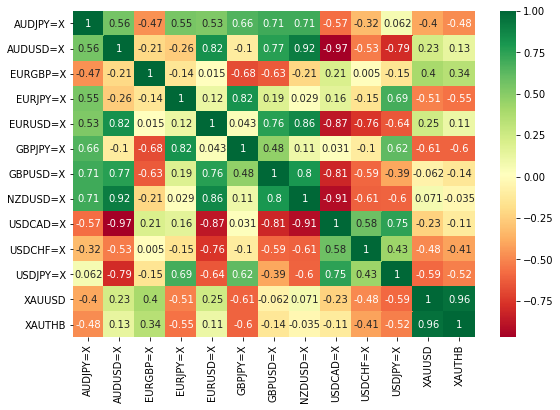

In [171]:
# Finally, we can plot a heatmap of the correlations (with Seaborn and Matplotlib) to better visualize the results:
fig, ax = plt.subplots(figsize=(9,6)) 
ax = seaborn.heatmap(corr_df, annot=True, cmap="RdYlGn")

In [85]:
corr_df.min()

AUDJPY=X   -0.568706
AUDUSD=X   -0.968256
EURGBP=X   -0.681918
EURJPY=X   -0.554858
EURUSD=X   -0.873144
GBPJPY=X   -0.681918
GBPUSD=X   -0.807123
NZDUSD=X   -0.910339
USDCAD=X   -0.968256
USDCHF=X   -0.755270
USDJPY=X   -0.788370
XAUUSD     -0.605096
XAUTHB     -0.604468
dtype: float64

max 
1. USDCAD=X , AUDUSD=X =  -0.968393
2. NZDUSD=X   -0.907996
3. EURUSD=X   -0.872155
4. GBPUSD=X   -0.808171
5. USDCHF=X   -0.747646



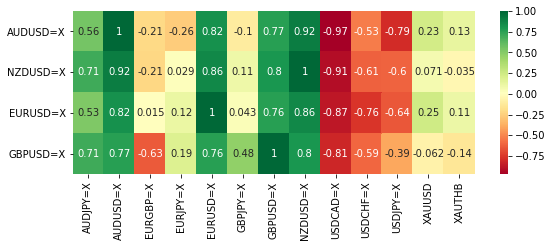

In [170]:
# 1. USDCAD=X , AUDUSD=X = -0.968393
uncorr1 = corr_df.nlargest(4, "AUDUSD=X")
fig, ax = plt.subplots(figsize=(9,3)) 
ax = seaborn.heatmap(uncorr1, annot=True, cmap="RdYlGn")

In [101]:
df_pivot.head()

,AUDJPY=X,AUDUSD=X,EURGBP=X,EURJPY=X,EURUSD=X,GBPJPY=X,GBPUSD=X,NZDUSD=X,USDCAD=X,USDCHF=X,USDJPY=X,XAUUSD,XAUTHB
Date,,,,,,,,,,,,,
02/01/2012,78.419998,1.020804,0.8331,99.610001,1.296008,119.519997,1.551205,0.778695,1.0209,0.9381,77.019997,1531.0,48303.0
03/01/2012,78.853104,1.025399,0.8336,99.531998,1.294096,119.370003,1.552000,0.781006,1.0174,0.9394,76.930000,1598.0,50416.9
04/01/2012,79.540001,1.037000,0.8342,100.146004,1.305602,120.010002,1.564407,0.790389,1.0111,0.9319,76.722000,1613.0,50753.0
05/01/2012,79.290001,1.034126,0.8284,99.190002,1.293142,119.703003,1.560939,0.786596,1.0134,0.9421,76.709999,1599.0,50616.3
06/01/2012,79.098701,1.025704,0.8252,98.707001,1.279607,119.570000,1.550171,0.781189,1.0196,0.9521,77.151001,1616.5,51121.8


In [152]:
df_pivot.info()
np.linspace(1, 2159, 8, dtype='int')

<class 'pandas.core.frame.DataFrame'>
Index: 2159 entries, 02/01/2012 to 03/06/2021
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AUDJPY=X  2159 non-null   float64
 1   AUDUSD=X  2159 non-null   float64
 2   EURGBP=X  2159 non-null   float64
 3   EURJPY=X  2159 non-null   float64
 4   EURUSD=X  2159 non-null   float64
 5   GBPJPY=X  2159 non-null   float64
 6   GBPUSD=X  2159 non-null   float64
 7   NZDUSD=X  2159 non-null   float64
 8   USDCAD=X  2159 non-null   float64
 9   USDCHF=X  2159 non-null   float64
 10  USDJPY=X  2159 non-null   float64
 11  XAUUSD    2159 non-null   float64
 12  XAUTHB    2159 non-null   float64
dtypes: float64(13)
memory usage: 236.1+ KB


array([   1,  309,  617,  925, 1234, 1542, 1850, 2159])

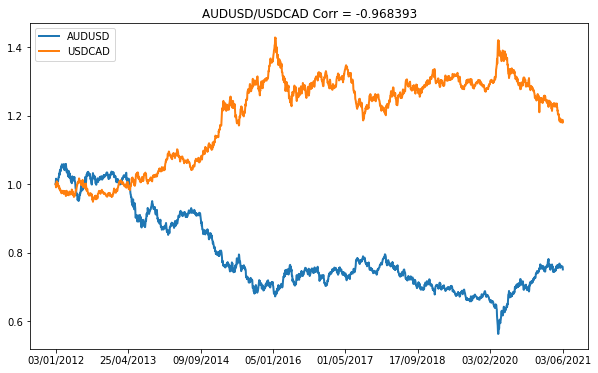

In [154]:
fig, ax = plt.subplots(figsize=(10,6)) 

# Define the date format
#date_form = DateFormatter('%Y-%m')
#ax.xaxis.set_major_formatter(date_form)
# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.YearLocator())

ax.set_xticks(np.linspace(1, 2158, 8, dtype='int'))

t = df_pivot["AUDUSD=X"]/df_pivot["AUDUSD=X"].iloc[0]
s = df_pivot["USDCAD=X"]/df_pivot["USDCAD=X"].iloc[0]

plt.title("AUDUSD/USDCAD Corr = -0.968393")
line, = plt.plot( t, lw=2, label='AUDUSD')
line, = plt.plot( s, lw=2, label='USDCAD')
plt.legend()
plt.show()

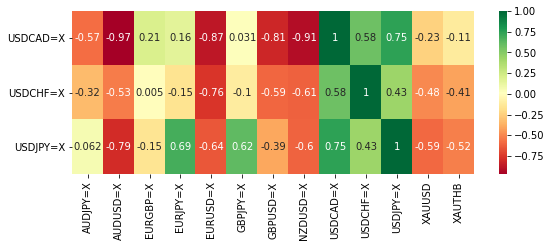

In [169]:
# 2. NZDUSD=X -0.907996
uncorr2 = corr_df.nsmallest(3, "NZDUSD=X")
fig, ax = plt.subplots(figsize=(9,3)) 
ax = seaborn.heatmap(uncorr2, annot=True, cmap="RdYlGn")

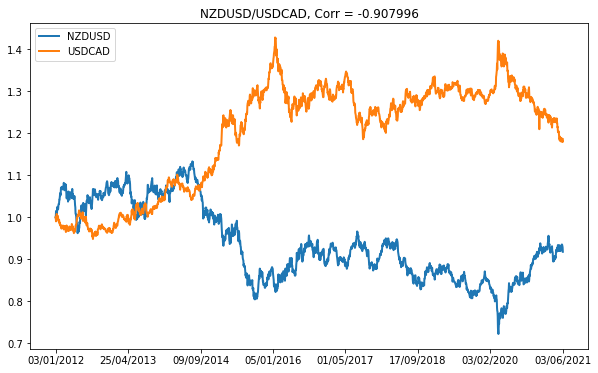

In [157]:
fig, ax = plt.subplots(figsize=(10,6)) 

ax.set_xticks(np.linspace(1, 2158, 8, dtype='int'))

t = df_pivot["NZDUSD=X"]/df_pivot["NZDUSD=X"].iloc[0]
s = df_pivot["USDCAD=X"]/df_pivot["USDCAD=X"].iloc[0]

plt.title("NZDUSD/USDCAD, Corr = -0.907996")
line, = plt.plot( t, lw=2, label='NZDUSD')
line, = plt.plot( s, lw=2, label='USDCAD')
plt.legend()
plt.show()

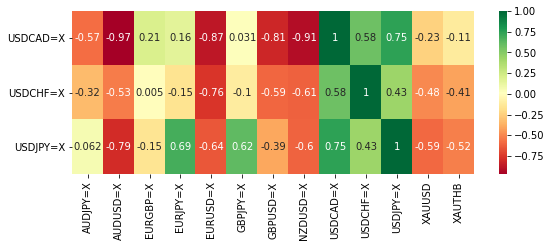

In [168]:
# 3. EURUSD=X -0.872155
uncorr3 = corr_df.nsmallest(3, "EURUSD=X")
fig, ax = plt.subplots(figsize=(9,3)) 
ax = seaborn.heatmap(uncorr3, annot=True, cmap="RdYlGn")

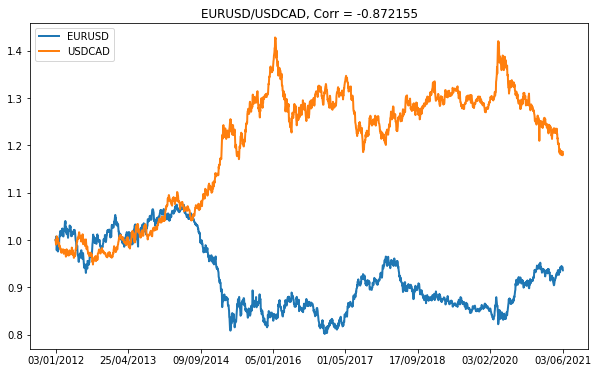

In [160]:
fig, ax = plt.subplots(figsize=(10,6)) 

t = df_pivot["EURUSD=X"]/df_pivot["EURUSD=X"].iloc[0]
s = df_pivot["USDCAD=X"]/df_pivot["USDCAD=X"].iloc[0]

ax.set_xticks(np.linspace(1, 2158, 8, dtype='int'))
plt.title("EURUSD/USDCAD, Corr = -0.872155")

line, = plt.plot( t, lw=2, label='EURUSD')
line, = plt.plot( s, lw=2, label='USDCAD')
plt.legend()
plt.show()

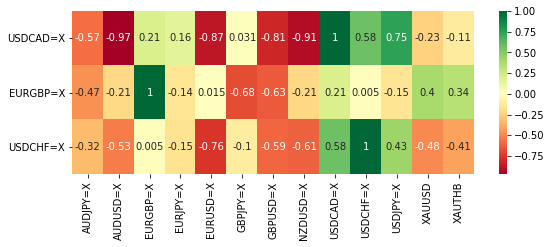

In [167]:
# 4. GBPUSD=X -0.808171
uncorr4 = corr_df.nsmallest(3, "GBPUSD=X")
fig, ax = plt.subplots(figsize=(9,3)) 
ax = seaborn.heatmap(uncorr4, annot=True, cmap="RdYlGn")

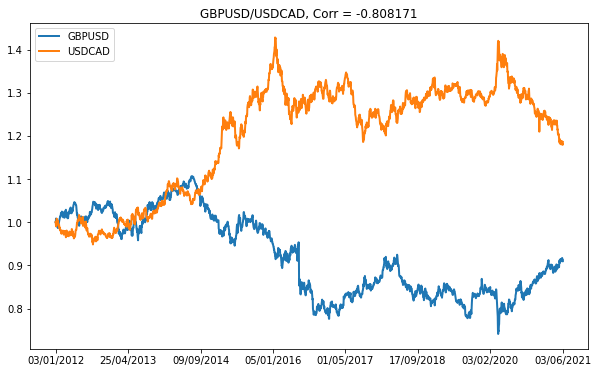

In [163]:
fig, ax = plt.subplots(figsize=(10,6)) 

t = df_pivot["GBPUSD=X"]/df_pivot["GBPUSD=X"].iloc[0]
s = df_pivot["USDCAD=X"]/df_pivot["USDCAD=X"].iloc[0]
ax.set_xticks(np.linspace(1, 2158, 8, dtype='int'))

plt.title("GBPUSD/USDCAD, Corr = -0.808171")
line, = plt.plot( t, lw=2, label='GBPUSD')
line, = plt.plot( s, lw=2, label='USDCAD')
plt.legend()
plt.show()

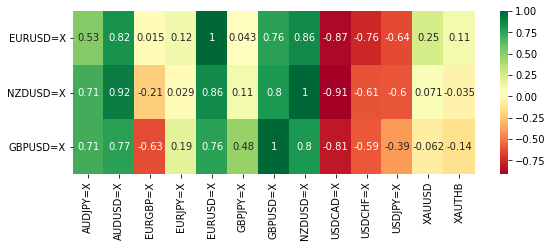

In [177]:
# 5. USDCHF=X -0.747646
uncorr5 = corr_df.nsmallest(3, "USDCHF=X")
fig, ax = plt.subplots(figsize=(9,3)) 
ax = seaborn.heatmap(uncorr5, annot=True, cmap="RdYlGn")


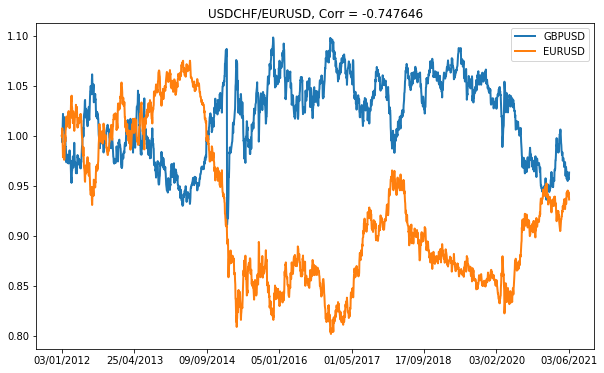

In [178]:
fig, ax = plt.subplots(figsize=(10,6)) 

t = df_pivot["USDCHF=X"]/df_pivot["USDCHF=X"].iloc[0]
s = df_pivot["EURUSD=X"]/df_pivot["EURUSD=X"].iloc[0]

ax.set_xticks(np.linspace(1, 2158, 8, dtype='int'))

plt.title("USDCHF/EURUSD, Corr = -0.747646")
line, = plt.plot(t, lw=2, label='GBPUSD')
line, = plt.plot(s, lw=2, label='EURUSD')
plt.legend()
plt.show()

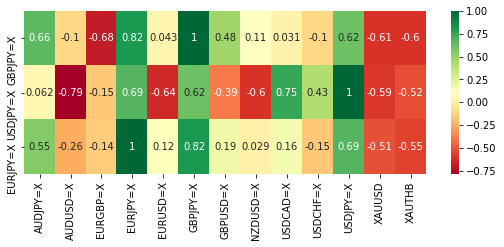

In [179]:
# 6. XAUUSD -0.605096
uncorr6 = corr_df.nsmallest(3, "XAUUSD")
fig, ax = plt.subplots(figsize=(9,3)) 
ax = seaborn.heatmap(uncorr6, annot=True, cmap="RdYlGn")

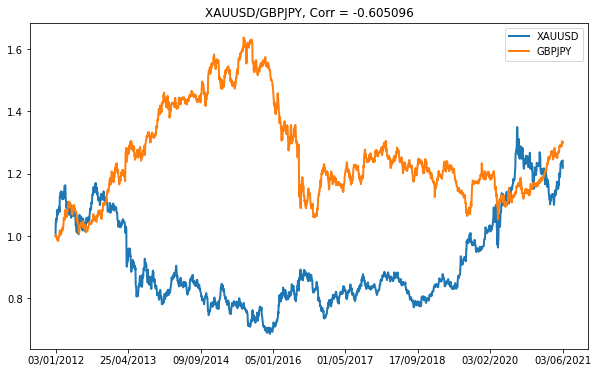

In [180]:
fig, ax = plt.subplots(figsize=(10,6)) 

t = df_pivot["XAUUSD"]/df_pivot["XAUUSD"].iloc[0]
s = df_pivot["GBPJPY=X"]/df_pivot["GBPJPY=X"].iloc[0]

ax.set_xticks(np.linspace(1, 2158, 8, dtype='int'))

plt.title("XAUUSD/GBPJPY, Corr = -0.605096")
line, = plt.plot(t, lw=2, label='XAUUSD')
line, = plt.plot(s, lw=2, label='GBPJPY')
plt.legend()
plt.show()

In [9]:
dataset = df_pivot.copy()

In [10]:
dataset.bfill(inplace=True)
dataset.isna().sum()

Symbol
Date        0
AUDJPY=X    0
AUDUSD=X    0
EURGBP=X    0
EURJPY=X    0
EURUSD=X    0
GBPJPY=X    0
GBPUSD=X    0
NZDUSD=X    0
USDCAD=X    0
USDCHF=X    0
USDJPY=X    0
dtype: int64

In [11]:
dataset.columns

Index(['Date', 'AUDJPY=X', 'AUDUSD=X', 'EURGBP=X', 'EURJPY=X', 'EURUSD=X',
       'GBPJPY=X', 'GBPUSD=X', 'NZDUSD=X', 'USDCAD=X', 'USDCHF=X', 'USDJPY=X'],
      dtype='object', name='Symbol')

In [12]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

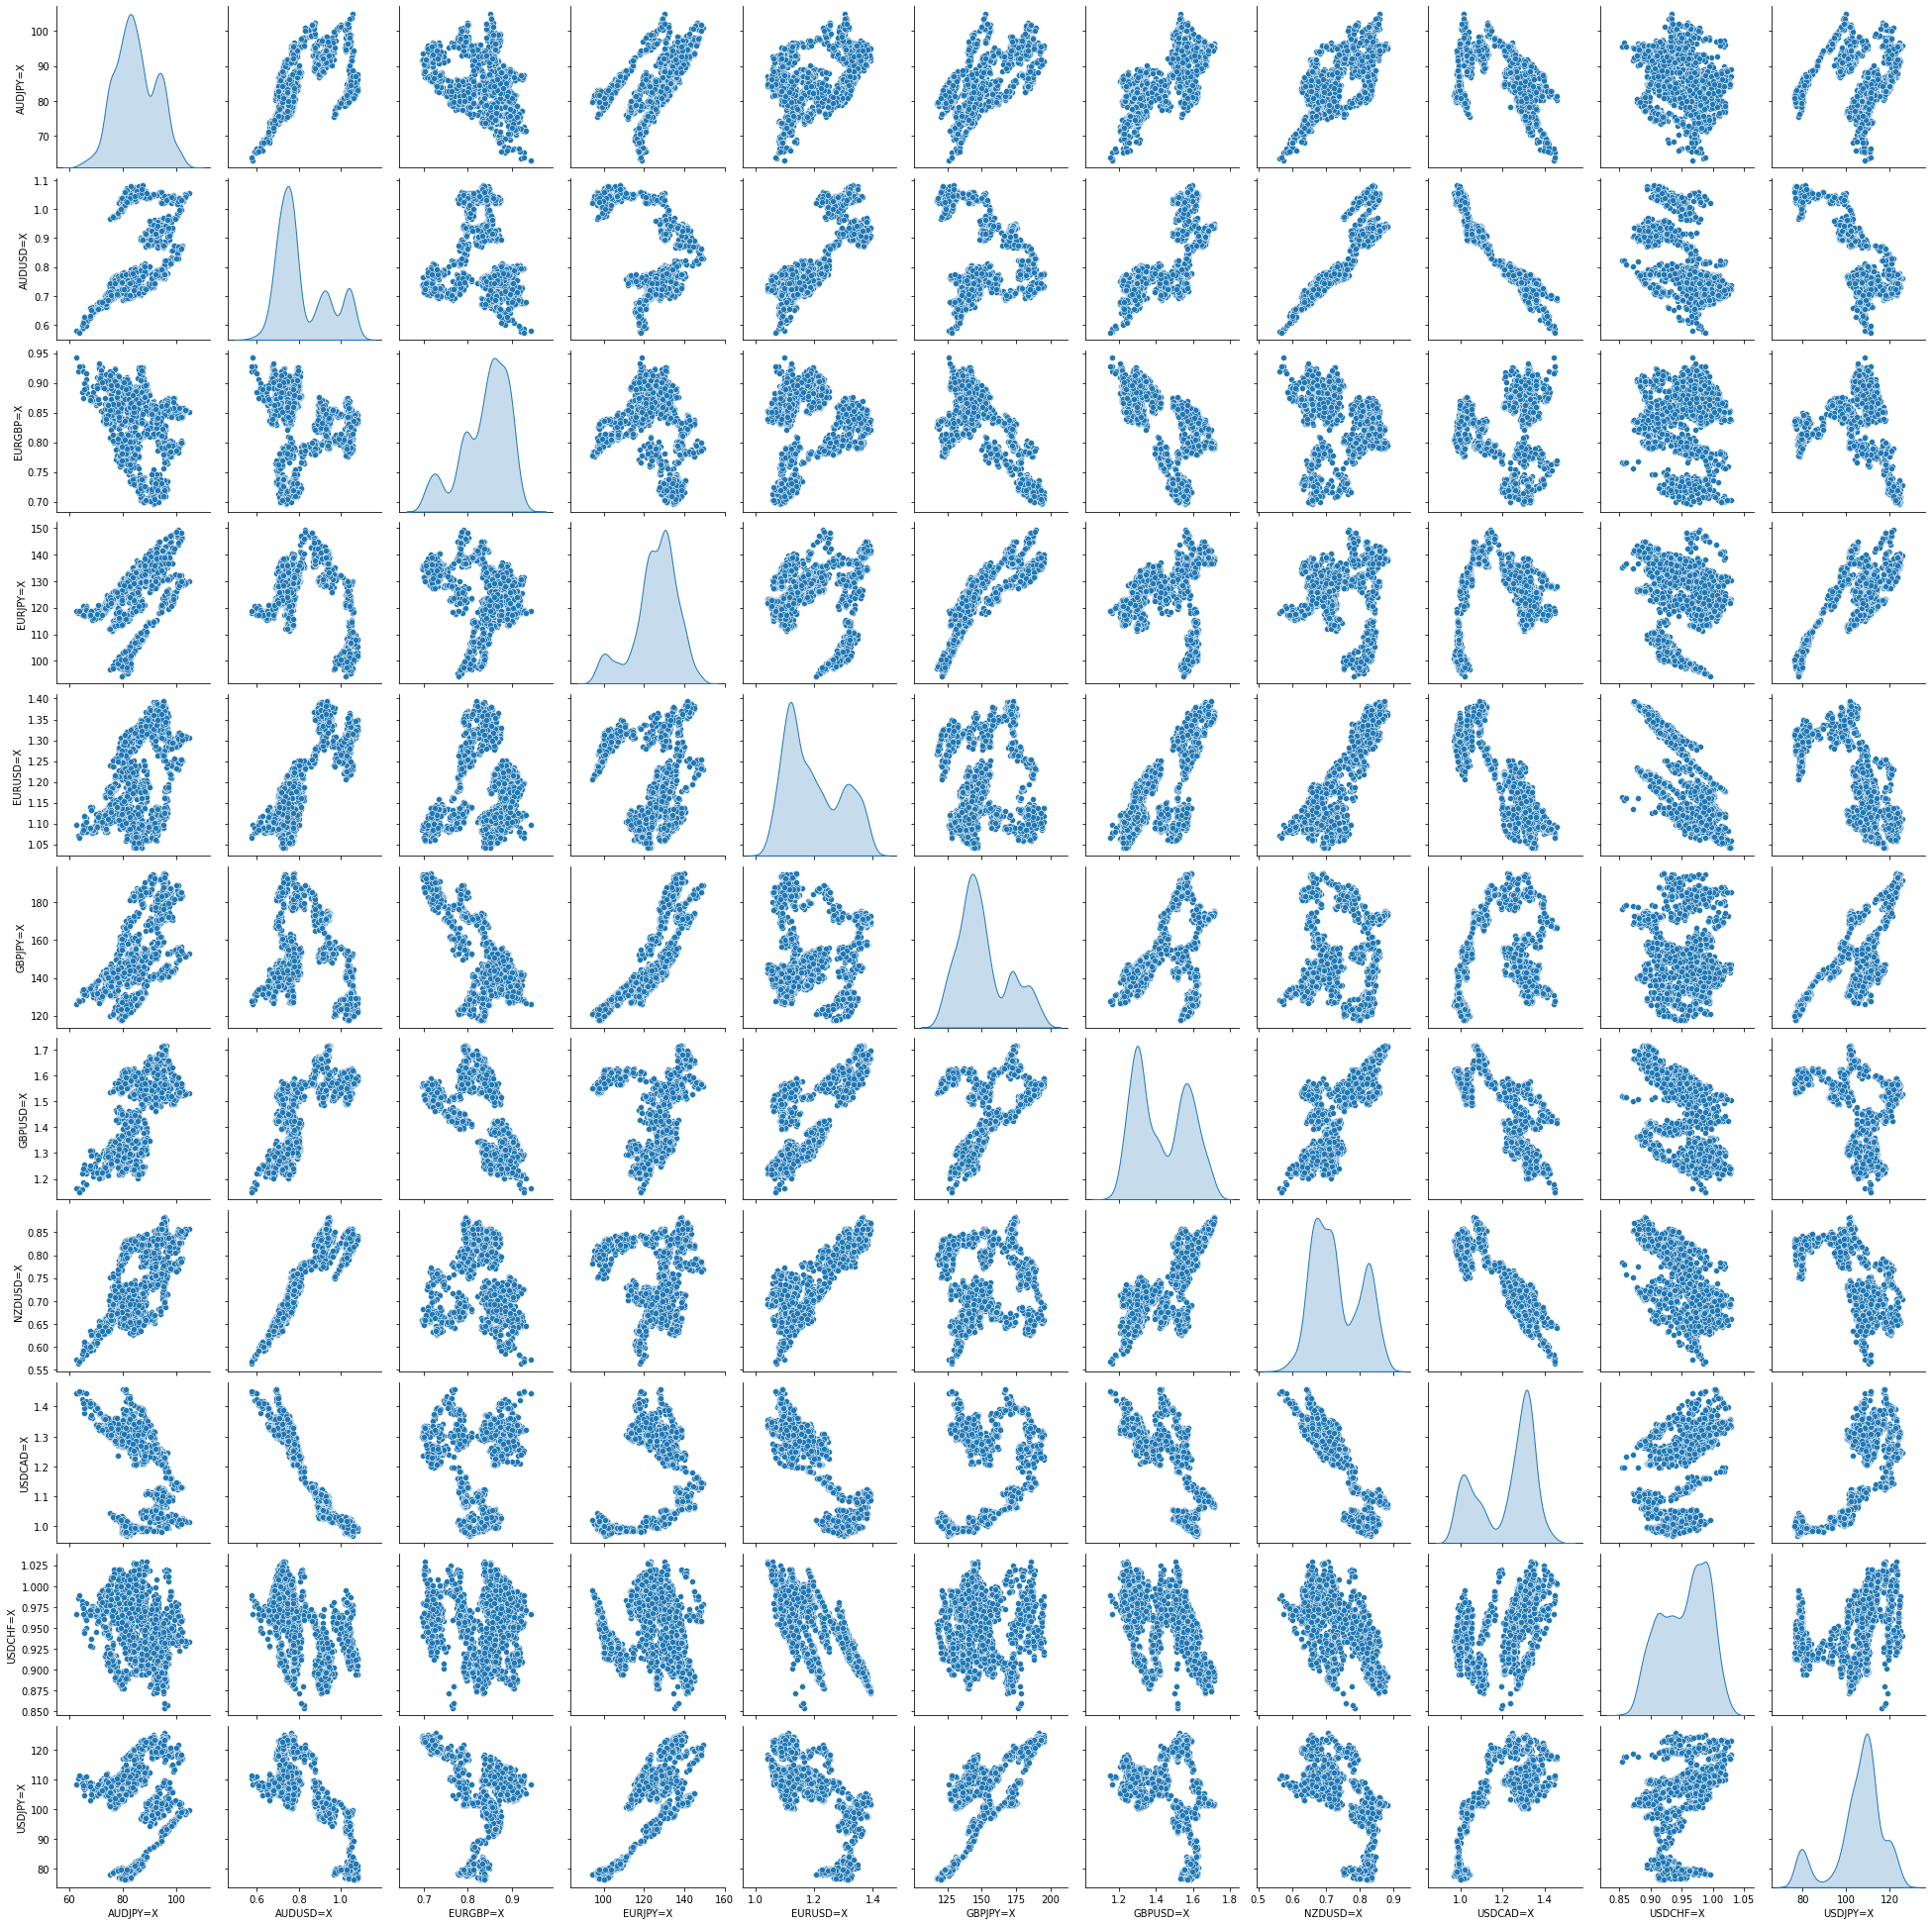

In [13]:
seaborn.pairplot(train_dataset[['AUDJPY=X', 'AUDUSD=X', 'EURGBP=X', 'EURJPY=X', 'EURUSD=X',
       'GBPJPY=X', 'GBPUSD=X', 'NZDUSD=X', 'USDCAD=X', 'USDCHF=X', 'USDJPY=X']], diag_kind='kde')

In [14]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Symbol,,,,,,,,
AUDJPY=X,1961.0,84.813807,7.622374,62.917999,79.434998,84.120003,91.295998,105.016998
AUDUSD=X,1961.0,0.813186,0.120548,0.574290,0.722961,0.766812,0.913993,1.080777
EURGBP=X,1961.0,0.838673,0.053535,0.695700,0.803000,0.851570,0.879610,0.942500
EURJPY=X,1961.0,125.688339,10.820803,94.209999,120.739998,127.350998,132.759995,149.440994
EURUSD=X,1961.0,1.196314,0.094845,1.040583,1.118356,1.175102,1.285843,1.393068
GBPJPY=X,1961.0,150.620521,18.153485,117.650002,138.406998,146.266006,160.949997,195.274994
GBPUSD=X,1961.0,1.432158,0.144711,1.149439,1.300965,1.410417,1.564407,1.716090
NZDUSD=X,1961.0,0.731800,0.070719,0.562610,0.674059,0.717829,0.800705,0.882379
USDCAD=X,1961.0,1.219726,0.131693,0.968270,1.089230,1.275840,1.322510,1.457800


In [15]:
train_dataset.columns

Index(['Date', 'AUDJPY=X', 'AUDUSD=X', 'EURGBP=X', 'EURJPY=X', 'EURUSD=X',
       'GBPJPY=X', 'GBPUSD=X', 'NZDUSD=X', 'USDCAD=X', 'USDCHF=X', 'USDJPY=X'],
      dtype='object', name='Symbol')

In [16]:
train_features = train_dataset.pop('AUDUSD=X')
test_features = test_dataset.pop('AUDUSD=X')

train_labels = train_dataset.copy().pop('USDCAD=X')
test_labels = test_dataset.copy().pop('USDCAD=X')

In [17]:
#Normalization
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Symbol,,
AUDJPY=X,84.813807,7.622374
EURGBP=X,0.838673,0.053535
EURJPY=X,125.688339,10.820803
EURUSD=X,1.196314,0.094845
GBPJPY=X,150.620521,18.153485
GBPUSD=X,1.432158,0.144711
NZDUSD=X,0.731800,0.070719
USDCAD=X,1.219726,0.131693
USDCHF=X,0.954536,0.037426


In [18]:
normalizer = preprocessing.Normalization(axis=-1)

In [19]:
normalizer.adapt(np.array(train_features))

In [20]:
print(normalizer.mean.numpy())

[0.8131864]


In [21]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [1.03]

Normalized: [[1.8]]


In [22]:
price = np.array(train_features)

price_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
price_normalizer.adapt(price)

In [23]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [24]:
dnn_price_model = build_and_compile_model(price_normalizer)

In [25]:
dnn_price_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [26]:
%%time
history = dnn_price_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 8.69 s, sys: 712 ms, total: 9.4 s
Wall time: 7.68 s


In [27]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.019567,0.020077,95
96,0.019818,0.020647,96
97,0.020144,0.022159,97
98,0.021057,0.021823,98
99,0.020236,0.021202,99


In [28]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.04])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Price]')
  plt.legend()
  plt.grid(True)

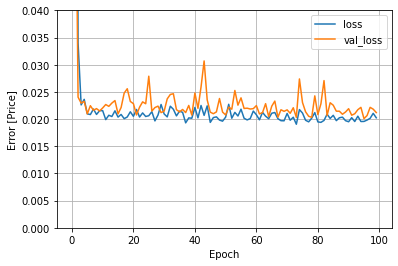

In [29]:
plot_loss(history)

In [30]:
def plot_price(x, y):
  plt.scatter(train_features, train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('priceAUD')
  plt.ylabel('priceCAD')
  plt.legend()

In [31]:
x = tf.linspace(0.4, 1.2, 200)
y = dnn_price_model.predict(x)

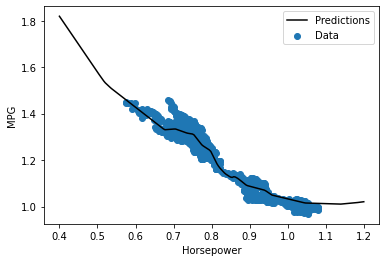

In [32]:
plot_price(x, y)

In [33]:
test_results = {}

test_results['dnn_price_model'] = dnn_price_model.evaluate(
    test_features,
    test_labels, verbose=0)

In [34]:
pd.DataFrame(test_results, index=['Mean absolute error [Price]']).T

,Mean absolute error [Price]
dnn_horsepower_model,0.018857


In [35]:
y = dnn_horsepower_model.predict([.752, .6])
y

array([[1.3110775],
       [1.427506 ]], dtype=float32)